# Market Basket Analysis

A **data mining technique** used to understand the purchase behavior of customers by analyzing the items they buy together in transactions

Associations are composed of Antecedent and Consequent.

In the example: Curd is the _Antecedent_ and Sour Cream is the _Consequent_.

## Support

Ratio of transactions that include one or more items to the total number of transactions.

### Calculate Support for Single Itemset

$$
    \text{Support}(X) = \frac{\text{X}}{\text{T}}
$$

Where:

- $X$: Number of transactions containing $X$, is the count of transactions in which the itemset $X$ appears.
- $T$: Total number of all transactions in dataset.

### Calculate Support for Association Rule

Transactions where both itemsets are present are used to determine the support for an association.

$$
    \text{Support}(X \cap Y) = \frac{{\text{Support}(X \cap Y)}}{\text{T}}
$$

- $X$: is the itemset with the association. (e.g. Curd and Sour Cream)
- $X \cap Y$: Number of transactions containing $X$ and $Y$.
- $T$: Total number of all transactions in dataset.

## Confidence

The confidence of an association rule $ X \rightarrow Y $ is calculated using the following formula:

$$\text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cap Y)}{\text{Support}(X)}$$

Where:
- $ X $ is the **antecedent** (the item or itemset that is known to be present).
- $ Y $ is the **consequent** (the item or itemset that is inferred to be present).
- $\text{Support}(X \cap Y)$ is the number of transactions that contain both $ X $ and $ Y $.
- $\text{Support}(X)$ is the number of transactions that contain $ X $.

> Different to Support, Confidence is not symetric.

## Lift

Lift is a metric used in association rule mining to evaluate the strength of an association between two items or itemsets.

Lift is particularly useful for identifying strong associations that may not be apparent from support and confidence alone.

The lift of an association rule $ X \rightarrow Y $ is calculated using the following formula:

$$\text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)}$$

Alternatively, it can also be expressed as:

$$\text{Lift}(X \rightarrow Y) = \frac{\text{Support}(X \cap Y)}{\text{Support}(X) \times \text{Support}(Y)}$$

### Interpretation of Lift
- **Lift = 1**: The items $X$ and $Y$ are independent; knowing that $X$ occurs does not provide any information about the occurrence of $Y$.
- **Lift > 1**: There is a positive association between $X$ and $Y$; they are more likely to be purchased together than would be expected by chance.
- **Lift < 1**: There is a negative association between $X$ and $Y$; they are less likely to be purchased together than would be expected by chance.

> Swapping antecedent and consequent in Lift formula wont affect results, this means that lifting is symmetric

In [19]:
transactions = [
    ['curd', 'sour cream'],
    ['curd', 'orange', 'sour cream'],
    ['bread', 'cheese', 'butter'],
    ['bread', 'butter'],
    ['bread', 'milk'],
    ['apple', 'orange', 'pear'],
    ['bread', 'milk', 'eggs'],
    ['tea', 'lemon'],
    ['curd', 'sour cream', 'apple'],
    ['eggs', 'wheat flour', 'milk'],
    ['pasta', 'cheese'],
    ['bread', 'cheese'],
    ['pasta', 'olive oil', 'cheese'],
    ['curd', 'jam'],
    ['bread', 'cheese', 'butter'],
    ['bread', 'sour cream', 'butter'],
    ['strawberry', 'sour cream'],
    ['curd', 'sour cream'],
    ['bread', 'coffee'],
    ['onion', 'garlic']
]

In [20]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)
df_itemsets = pd.DataFrame(encoded_array, columns=encoder.columns_)

display(df_itemsets)

,apple,bread,butter,cheese,coffee,curd,eggs,garlic,jam,lemon,milk,olive oil,onion,orange,pasta,pear,sour cream,strawberry,tea,wheat flour
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
6,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


`transactions` data should be transformed into a "One-Hot Encoded Boolean Array" in order to be processed by the Apriori algorithm later.

A "One-Hot Encoded Boolean Array" is a representation of categorical data where each category is converted into a binary vector. In this representation, each category is represented by a vector that has a length equal to the number of unique categories, with all elements set to 0 except for the index corresponding to the category, which is set to 1.

Having the following categories:

| Color  | Red | Green | Blue |
|--------|-----|-------|------|
| Red    |  1  |   0   |  0   |
| Green  |  0  |   1   |  0   |
| Blue   |  0  |   0   |  1   |

In constrast with bag of words:

| Sentence            | Apple | Banana | Orange |
|---------------------|-------|--------|--------|
| I like apple        |   1   |   0    |   0    |
| I like banana       |   0   |   1    |   0    |


In [21]:
# identify frequent items in transactions
from mlxtend.frequent_patterns import apriori

# Apriori will omit with less than 10% of occurrence
ITEMSETS_RATIO=0.1

frequent_itemsets = apriori(df_itemsets, min_support=ITEMSETS_RATIO, use_colnames=True)

display(frequent_itemsets)

,support,itemsets
0,0.10,(apple)
1,0.40,(bread)
2,0.20,(butter)
3,0.25,(cheese)
4,0.25,(curd)
5,0.10,(eggs)
6,0.15,(milk)
7,0.10,(orange)
8,0.10,(pasta)
9,0.30,(sour cream)


With the support of each itemset with at least 10% of occurence, the next step would be determining the frequency.

In [22]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda itemset: len(itemset))

display(frequent_itemsets)

,support,itemsets,length
0,0.10,(apple),1
1,0.40,(bread),1
2,0.20,(butter),1
3,0.25,(cheese),1
4,0.25,(curd),1
5,0.10,(eggs),1
6,0.15,(milk),1
7,0.10,(orange),1
8,0.10,(pasta),1
9,0.30,(sour cream),1


The column `length` determines how many items are in an itemset. With `support`, `itemsets` and `length` we are ready to generate association rules.

In [23]:
from mlxtend.frequent_patterns import association_rules

# return association rules with confidence metric of `0.5` or more
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread),(butter),0.40,0.20,0.20,0.500000,2.500000,0.120,1.60,1.000000
1,(butter),(bread),0.20,0.40,0.20,1.000000,2.500000,0.120,inf,0.750000
2,(cheese),(bread),0.25,0.40,0.15,0.600000,1.500000,0.050,1.50,0.444444
3,(milk),(bread),0.15,0.40,0.10,0.666667,1.666667,0.040,1.80,0.470588
4,(butter),(cheese),0.20,0.25,0.10,0.500000,2.000000,0.050,1.50,0.625000
5,(pasta),(cheese),0.10,0.25,0.10,1.000000,4.000000,0.075,inf,0.833333
6,(sour cream),(curd),0.30,0.25,0.20,0.666667,2.666667,0.125,2.25,0.892857
7,(curd),(sour cream),0.25,0.30,0.20,0.800000,2.666667,0.125,3.50,0.833333
8,(eggs),(milk),0.10,0.15,0.10,1.000000,6.666667,0.085,inf,0.944444
9,(milk),(eggs),0.15,0.10,0.10,0.666667,6.666667,0.085,2.70,1.000000


In order to visualize the association rules (antecedents -> consequents) and lift metrics, a new DataFrame containing these columns is created.

In [24]:
rules_plot = pd.DataFrame()

rules_plot['antecedents'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules_plot['consequents'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules_plot['lift'] = rules['lift'].apply(lambda x: round(x, 2))

display(rules_plot)

,antecedents,consequents,lift
0,bread,butter,2.50
1,butter,bread,2.50
2,cheese,bread,1.50
3,milk,bread,1.67
4,butter,cheese,2.00
5,pasta,cheese,4.00
6,sour cream,curd,2.67
7,curd,sour cream,2.67
8,eggs,milk,6.67
9,milk,eggs,6.67


With the desired DataFrame in place, a matrix can be created from it to make it easier to plot this data in a heatmap.

In [29]:
pivot = rules_plot.pivot(index = 'antecedents', columns = 'consequents', values = 'lift')
display(pivot)

consequents,bread,"bread,cheese",butter,cheese,curd,eggs,milk,sour cream
antecedents,,,,,,,,
bread,NaN,NaN,2.50,NaN,NaN,NaN,NaN,NaN
"bread,butter",NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
"bread,cheese",NaN,NaN,3.33,NaN,NaN,NaN,NaN,NaN
butter,2.50,3.33,NaN,2.0,NaN,NaN,NaN,NaN
"butter,cheese",2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cheese,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.67
eggs,NaN,NaN,NaN,NaN,NaN,NaN,6.67,NaN
milk,1.67,NaN,NaN,NaN,NaN,6.67,NaN,NaN


In [30]:
import numpy as np

antecedents = list(pivot.index.values)
consequents = list(pivot.columns)

pivot = pivot.to_numpy()

display(pivot)

array([[ nan,  nan, 2.5 ,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan, 2.  ,  nan,  nan,  nan,  nan],
       [ nan,  nan, 3.33,  nan,  nan,  nan,  nan,  nan],
       [2.5 , 3.33,  nan, 2.  ,  nan,  nan,  nan,  nan],
       [2.5 ,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [1.5 ,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 2.67],
       [ nan,  nan,  nan,  nan,  nan,  nan, 6.67,  nan],
       [1.67,  nan,  nan,  nan,  nan, 6.67,  nan,  nan],
       [ nan,  nan,  nan, 4.  ,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan, 2.67,  nan,  nan,  nan]])

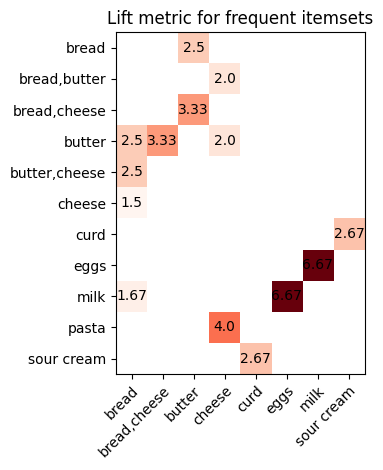

In [31]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(pivot, cmap = 'Reds')

ax.set_xticks(np.arange(len(consequents)))
ax.set_yticks(np.arange(len(antecedents)))
ax.set_xticklabels(consequents)
ax.set_yticklabels(antecedents)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
  rotation_mode="anchor")

for i in range(len(antecedents)):
    for j in range(len(consequents)):
        if not np.isnan(pivot[i, j]):
            text = ax.text(j, i, pivot[i, j], ha="center", va="center")

ax.set_title("Lift metric for frequent itemsets")
fig.tight_layout()
plt.show()

With _Association Rules_ in place, we can now generate _Actionable Insights_ for, for instance, recommendations.
With _X_ item in the cart, which is the item _Y_ that is likely to be added?

In [33]:
# Find rules where `butter` is the antecedent
butter_antecedent = rules[rules['antecedents'] == {'butter'}][['consequents','confidence']].sort_values('confidence', ascending = False)

# Sort rules by confidence colums so highest confidence rating appear at the beginnig of the `butter_antecedent`
butter_consequents = [list(item) for item in butter_antecedent.iloc[0:3:,]['consequents']]

item = 'butter'
print('Items frequently bought together with', item, 'are:', butter_consequents)

Items frequently bought together with butter are: [['bread'], ['cheese'], ['bread', 'cheese']]


We can also plan discounts based on association rules.

In [34]:
from functools import reduce

rules['itemsets'] = rules[['antecedents', 'consequents']].apply(lambda x: reduce(frozenset.union, x), axis=1)
display(rules[['antecedents','consequents','itemsets']])

,antecedents,consequents,itemsets
0,(bread),(butter),"(bread, butter)"
1,(butter),(bread),"(bread, butter)"
2,(cheese),(bread),"(bread, cheese)"
3,(milk),(bread),"(bread, milk)"
4,(butter),(cheese),"(butter, cheese)"
5,(pasta),(cheese),"(pasta, cheese)"
6,(sour cream),(curd),"(sour cream, curd)"
7,(curd),(sour cream),"(sour cream, curd)"
8,(eggs),(milk),"(eggs, milk)"
9,(milk),(eggs),"(eggs, milk)"


Get rid of duplicates in the `itemset` column.

In [35]:
rules.drop_duplicates(subset=['itemsets'], keep='first', inplace=True)
display(rules['itemsets'])

0             (bread, butter)
2             (bread, cheese)
3               (bread, milk)
4            (butter, cheese)
5             (pasta, cheese)
6          (sour cream, curd)
8                (eggs, milk)
10    (bread, butter, cheese)
Name: itemsets, dtype: object

In [37]:
discounted = []
others = []C

for itemset in rules['itemsets']:
    for i, item in enumerate(itemset):
        if item not in others:
            discounted.append(item)
            itemset = set(itemset)
            itemset.discard(item)
            others.extend(itemset)
            break

        if i == len(itemset)-1:
            discounted.append(item)
            itemset = set(itemset)
            itemset.discard(item)
            others.extend(itemset)

display(discounted)

['bread', 'bread', 'bread', 'cheese', 'pasta', 'sour cream', 'eggs', 'bread']

In [38]:
# Clear duplicates
print(list(set(discounted)))

['sour cream', 'bread', 'pasta', 'cheese', 'eggs']
